# Implementaçao Detector de Cantos Harrys



In [20]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul  1 13:38:10 2021

@author: leona
"""

# -*- coding: utf-8 -*-
"""
Created on Tue Jun 29 10:11:23 2021

@author: leona
"""
import numpy as np
import matplotlib.pyplot as plt
import cv2

#Implementação utilizando o Opencv

def Harrisp(img):
    gray = np.float32(img)
    # blockSize=2, aperture size sobel = 3, k =0.04
    dst = cv2.cornerHarris(gray,2,3,0.04)
    # Threshold for an optimal value, it may vary depending on the image.
    
    gray[dst>0.01*dst.max()]=[20]
    return gray

#Iplementção 
def Harris(img):
    
    img = np.float32(img)
    
    Sx = np.array([[-1, 0, 1], [-2, 0, 2],[-1, 0, 1]])
    Sy = np.array([[-1, -2, -1], [0, 0, 0],[1, 2, 1]])
    
    Ix = cv2.filter2D(img, -1, Sx)
    Iy = cv2.filter2D(img, -1, Sy)
    
    Ixx = Ix*Ix
    Iyy = Iy*Iy
    Ixy = Ix*Iy
    
    Sxx = cv2.GaussianBlur(Ixx,(5,5), cv2.BORDER_DEFAULT)
    Syy = cv2.GaussianBlur(Iyy,(5,5), cv2.BORDER_DEFAULT)
    Sxy = cv2.GaussianBlur(Ixy,(5,5), cv2.BORDER_DEFAULT)
    
    k = 0.04
    R = (Sxx*Syy - Sxy*Sxy) - k*((Sxx + Syy)**2)
    img[R>0.07*R.max()]=[20]
    
    return img
    
#Adiciona ruído Gaussiano
def noyse(img, mean, std):
    
    img = np.float32(img)   
    img = img + np.random.normal(mean, std, img.shape)
    # img = img/(img.max()/255)
    
    return img    

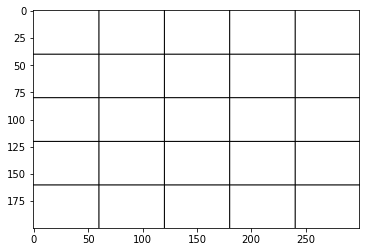

In [21]:
# Cria de uma imagem sintetica
row = 200 
cols = 300
   
imgs = np.zeros((row,cols))
imgs[:,:] = 255

imgs[:,np.arange(int(cols/5),cols,int(cols/5))] = 0
imgs[np.arange(int(row/5),row,int(row/5)),:] = 0

plt.figure(6)
plt.imshow(imgs, cmap = 'gray')

In [22]:
#Quantidade de teste
t = 500

#Inicializando variável
std = 0 
imgf = np.zeros((row, cols, t))
imgfp = np.zeros((row, cols, t))
resul = np.zeros((7,t))

#Adicionando ruído na imagem sintetica com media zeros e variando std
for i in np.arange(0,t):
    mean = 0
    resul[0,i] = std
    img = noyse(imgs, mean, std)
    imgf[:,:,i] = Harris(img) 
    # plt.imsave('./plot/image_' + str(i) + '.jpg', np.uint8(imgf[:,:,i]), cmap='gray')
    imgfp[:,:,i] = Harrisp(img) 
    # plt.imsave('./plot/imagep_' + str(i) + '.jpg', np.uint8(imgfp[:,:,i]), cmap='gray')
    std = std + 0.5

#Comparando as imagens sintetica inicial com o ruído
for k in np.arange(0,t): 
    #Inicializa o contador
    conta = 0
    contp = 0
    conte = 0
    contap = 0
    contpp = 0
    contep = 0
    
    for i in np.arange(0,row):
        for j in np.arange(0,cols):
            #Contador de acertos, perda e erros da implementação
            if (imgf[i,j,k] == 20 and imgf[i,j,0] == 20):
                conta = conta + 1
            if (imgf[i,j,k] != 20 and imgf[i,j,0] == 20):
                contp = contp + 1
            if (imgf[i,j,k] == 20 and imgf[i,j,0] != 20):
                conte = conte + 1
            
            #Contador de acertos, perda e erros da Opencv
            if (imgfp[i,j,k] == 20 and imgfp[i,j,0] == 20):
                contap = contap + 1        
            if (imgfp[i,j,k] != 20 and imgfp[i,j,0] == 20):
                contpp = contpp + 1
            if (imgfp[i,j,k] == 20 and imgfp[i,j,0] != 20):
                contep = contep + 1
    
    #Armazen os resultados
    resul[1,k] = conta
    resul[2,k] = contp
    resul[3,k] = conte
    resul[4,k] = contap
    resul[5,k] = contpp
    resul[6,k] = contep

In [23]:
#Calcula o RMSE
n = row*cols
rstd = resul[0,:]
rms1 = np.sqrt(((resul[1,:] - resul[1,0])**2)/n)
rms2 = np.sqrt(((resul[2,:] - resul[2,0])**2)/n)
rms3 = np.sqrt(((resul[3,:] - resul[3,0])**2)/n) 
rmsp1 = np.sqrt(((resul[4,:] - resul[4,0])**2)/n)
rmsp2 = np.sqrt(((resul[5,:] - resul[5,0])**2)/n) 
rmsp3 = np.sqrt(((resul[6,:] - resul[6,0])**2)/n) 

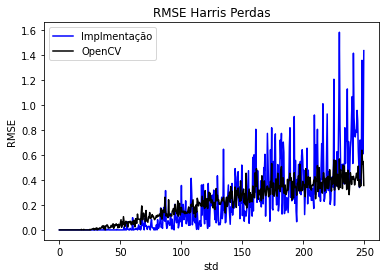

In [25]:
#Plotando os Gráficos Comparando Perdas 
plt.figure(1)
plt.plot(rstd, rms2, color='blue', label = 'Implmentação')
plt.plot(rstd,rmsp2, color='black', label = 'OpenCV')
plt.title('RMSE Harris Perdas')
plt.xlabel("std")
plt.ylabel("RMSE")
plt.legend()
plt.show()

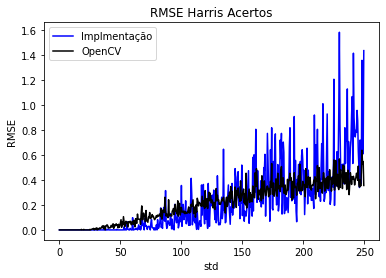

In [26]:
#Plotando os Gráficos Comparando Acertos 
plt.figure(0)
plt.plot(rstd, rms1, color='blue', label = 'Implmentação')
plt.plot(rstd,rmsp1, color='black', label = 'OpenCV')
plt.title('RMSE Harris Acertos')
plt.xlabel("std")
plt.ylabel("RMSE")
plt.legend()
plt.show()

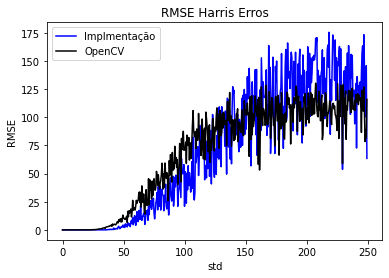

In [27]:
#Plotando os Gráficos Comparando Erros 
plt.figure(2)
plt.plot(rstd, rms3, color='blue', label = 'Implmentação')
plt.plot(rstd,rmsp3, color='black', label = 'OpenCV')
plt.title('RMSE Harris Erros')
plt.xlabel("std")
plt.ylabel("RMSE")
plt.legend()
plt.show()